#Lab-8

Implement Boosting ensemble method on a given
dataset.

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving income.csv to income.csv


To Do: Implementation – AdaBoost

Write Python code to implement the following. Consider dataset files as “income.csv”

Build a AdaBoost classifier to classify Income dataset

Measure prediction score using n_estimators (10).

Now fine tune your model by changing number of trees in your classifier and identify what best score you can get using how
many trees

Default AdaBoost Accuracy (n_estimators=10): 0.8182
Best Accuracy: 0.8340 with n_estimators=73


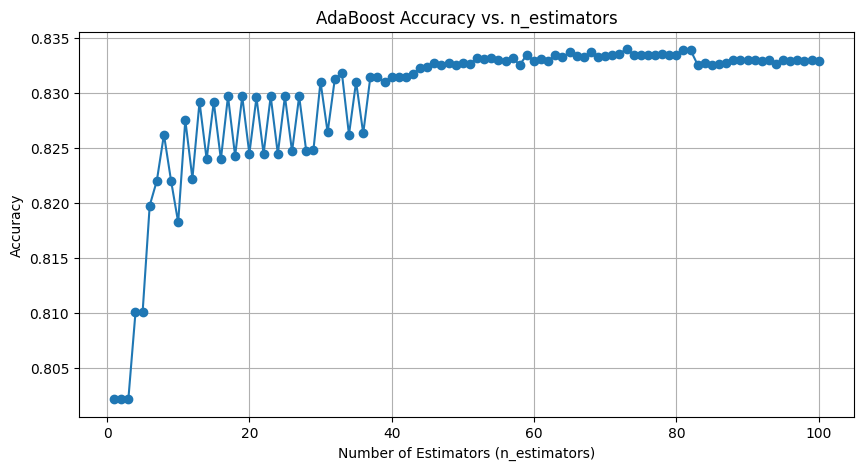

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("income.csv")

# Split into features and target
X = data.drop("income_level", axis=1)
y = data["income_level"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Default AdaBoost with n_estimators=10
ada_default = AdaBoostClassifier(n_estimators=10, random_state=42)
ada_default.fit(X_train, y_train)
y_pred_default = ada_default.predict(X_test)
default_score = accuracy_score(y_test, y_pred_default)
print(f"Default AdaBoost Accuracy (n_estimators=10): {default_score:.4f}")

# Fine-tuning: Try different numbers of estimators
scores = {}
for n in range(1, 101):
    ada = AdaBoostClassifier(n_estimators=n, random_state=42)
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)
    scores[n] = accuracy_score(y_test, y_pred)

# Find best n_estimators
best_n = max(scores, key=scores.get)
best_score = scores[best_n]
print(f"Best Accuracy: {best_score:.4f} with n_estimators={best_n}")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(list(scores.keys()), list(scores.values()), marker='o')
plt.title("AdaBoost Accuracy vs. n_estimators")
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


Default AdaBoost Accuracy (n_estimators=10): 0.8182
Best Accuracy: 0.8340 with n_estimators=73
Confusion Matrix:
 [[7015  399]
 [1223 1132]]


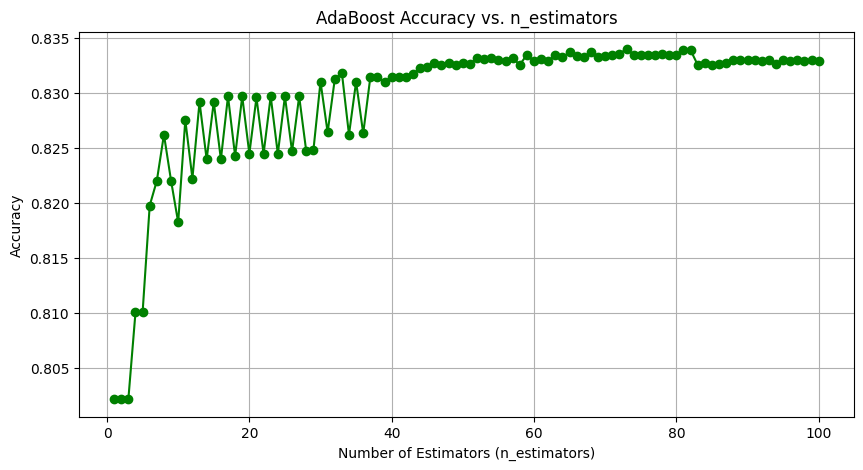

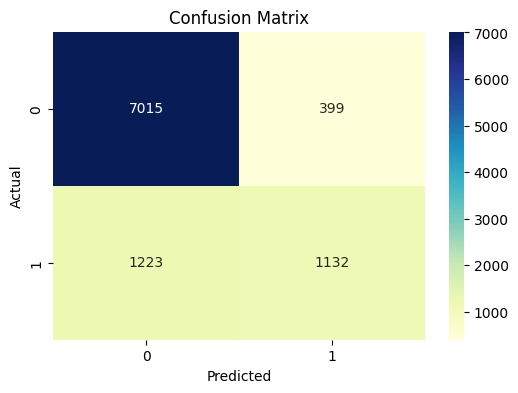

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("income.csv")

# Split into features and target
X = data.drop("income_level", axis=1)
y = data["income_level"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Default AdaBoost with n_estimators=10
ada_default = AdaBoostClassifier(n_estimators=10, random_state=42)
ada_default.fit(X_train, y_train)
y_pred_default = ada_default.predict(X_test)
default_score = accuracy_score(y_test, y_pred_default)
print(f"Default AdaBoost Accuracy (n_estimators=10): {default_score:.4f}")

# Fine-tuning: Try different numbers of estimators
scores = {}
for n in range(1, 101):
    ada = AdaBoostClassifier(n_estimators=n, random_state=42)
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)
    scores[n] = accuracy_score(y_test, y_pred)

# Find best n_estimators
best_n = max(scores, key=scores.get)
best_score = scores[best_n]
print(f"Best Accuracy: {best_score:.4f} with n_estimators={best_n}")

# Train best model and generate confusion matrix
ada_best = AdaBoostClassifier(n_estimators=best_n, random_state=42)
ada_best.fit(X_train, y_train)
y_pred_best = ada_best.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:\n", cm)

# Plotting accuracy vs n_estimators
plt.figure(figsize=(10, 5))
plt.plot(list(scores.keys()), list(scores.values()), marker='o', color='green')
plt.title("AdaBoost Accuracy vs. n_estimators")
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=ada_best.classes_, yticklabels=ada_best.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
